# Posttest_5
Nama  : Hendi
NIM   : 2009106009
Kelas : Praktikum Kecerdasn Buatan A1 2020

## Import Library

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read Data

In [140]:
df = pd.read_csv("Application_Dataset.csv")
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [141]:
dfCat = df.select_dtypes(include=['object'])

for i in dfCat.columns:
    print(dfCat[i].value_counts())
    print("\n")

F          15627
M           9501
Name: Applicant_Gender, dtype: int64


Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: Income_Type, dtype: int64


Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: Education_Type, dtype: int64


Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow           

## One-Hot Encoding

In [142]:
encoder = OneHotEncoder(sparse=False)
Gender = encoder.fit_transform(df[['Applicant_Gender']])

Genders = pd.DataFrame(Gender)
df= df.join(Genders)

df = df.rename(columns={
    0 : 'F',
    1 : 'M',
})

df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,F,M
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Security staff ...,2,59,4,0,30,1,0.0,1.0
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,1,Sales staff ...,1,53,9,0,5,1,1.0,0.0
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,1,Sales staff ...,1,53,9,0,5,1,1.0,0.0
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,1,Sales staff ...,1,53,9,0,27,1,1.0,0.0
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,1,Sales staff ...,1,53,9,0,39,1,1.0,0.0


## Split Data

In [143]:
X = df[['Total_Income','Applicant_Age','F','M','Total_Bad_Debt','Total_Good_Debt']]
y = df[['Status']]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Normalisasi Data

In [145]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

## Naive Bayes

In [146]:
nb  = GaussianNB()
nb.fit(X_train_std,y_train)

nb_pred = gaussnb.predict(X_test_std)
akurasi_nb = accuracy_score(y_test, gaussnb_pred)
print("Akurasi algoritma Naive Bayes :", round(akurasi_nb,2))

Akurasi algoritma Naive Bayes : 0.98


## SVM

In [147]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

Akurasi algoritma SVC : 1.0


## Perbandingan

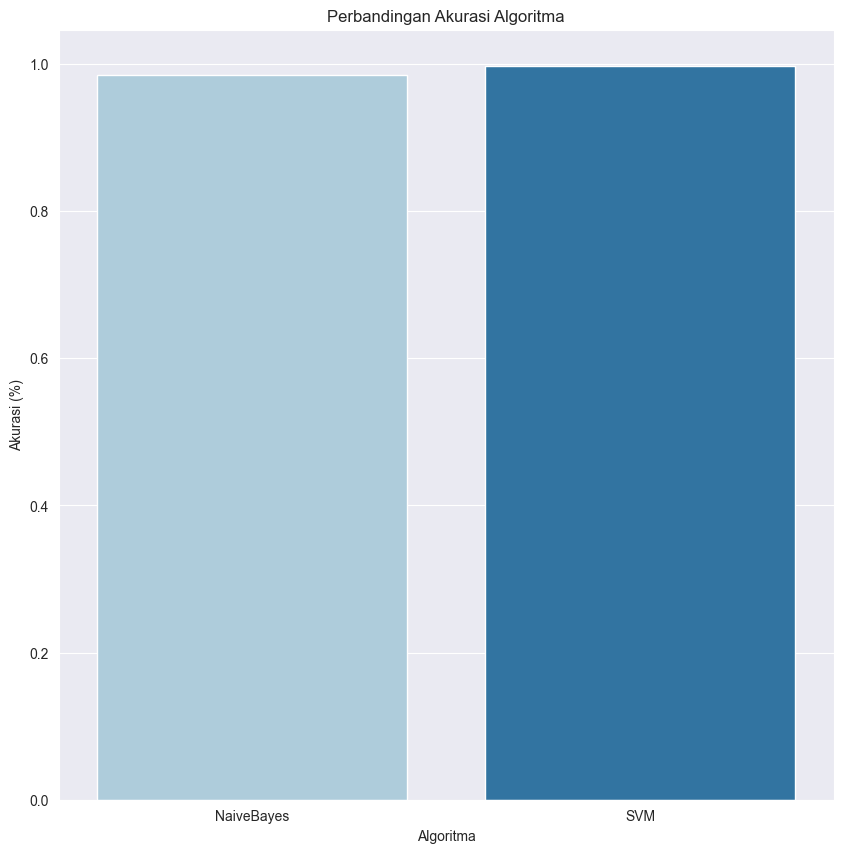

In [148]:
algoritma = ["NaiveBayes","SVM"]
akurasi = [akurasi_nb,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='Paired')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## Confusion Matrix

Confusion matrix : 

 [[  35    0]
 [7504    0]]


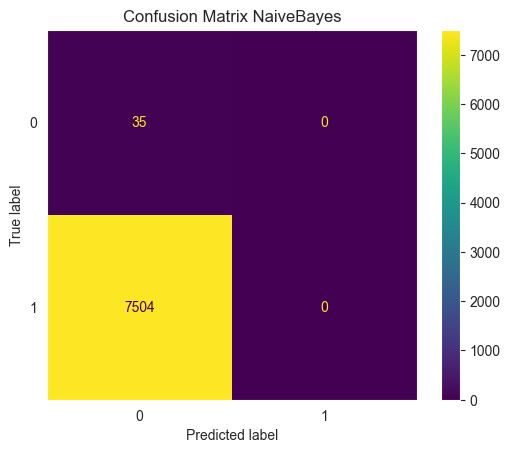

In [151]:
nb = GaussianNB()
nb.fit(X_train,y_train)

nb_pred = gaussnb.predict(X_test)

cm = confusion_matrix(y_test, nb_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
displays.plot()

plt.title("Confusion Matrix NaiveBayes")
plt.grid(False)